In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string

In [ ]:
!pip freeze > requirements.txt

In [2]:
# Descargar stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
df=pd.read_csv('scopus.csv')
df.head(10)

,Authors,Author full names,Author(s) ID,Title,Source title,Link,Abstract,Index Keywords,Open Access
0,Jedidi A.,"Jedidi, Ahmed (24467864000)",24467864000,Dynamic trust security approach for edge compu...,Engineering Research Express,https://www.scopus.com/inward/record.uri?eid=2...,The Industrial Internet of Things (IIoT) encom...,Artificial intelligence; Internet of things; S...,All Open Access; Hybrid Gold Open Access
1,Wang Y.; Hao Y.; Hou Y.; Quan Q.; Li Y.,"Wang, Yan (59138070000); Hao, Yu (58953118700)...",59138070000; 58953118700; 59137293600; 5913744...,Optimizing scope 3 emissions in the automotive...,Carbon Research,https://www.scopus.com/inward/record.uri?eid=2...,The acceleration of global climate change pose...,NaN,All Open Access; Gold Open Access
2,Nawrocki P.; Smendowski M.,"Nawrocki, Piotr (24587357500); Smendowski, Mat...",24587357500; 58561034700,FinOps-driven optimization of cloud resource u...,Journal of Computational Science,https://www.scopus.com/inward/record.uri?eid=2...,Cloud computing is gaining popularity in high-...,Cloud computing; Forecasting; Simulation platf...,NaN
3,Aljohani M.,"Aljohani, Maha (56964208500)",56964208500,Transforming data-intensive workflows: A cutti...,Concurrency and Computation: Practice and Expe...,https://www.scopus.com/inward/record.uri?eid=2...,The data-intensive workflow application execut...,Economic and social effects; Energy utilizatio...,NaN
4,Wang C.; Zhou Z.; Zheng G.,"Wang, Chunxiang (58836253300); Zhou, Zhangbing...",58836253300; 24340085800; 57671718000,Efficient weighted multi-source trust aggregat...,Social Network Analysis and Mining,https://www.scopus.com/inward/record.uri?eid=2...,Edge computing offloading involves moving comp...,Computation offloading; Network security; Aggr...,NaN
5,Xue J.; Yao J.; Wang J.,"Xue, Jianbin (26326602500); Yao, Jia (58558419...",26326602500; 58558419600; 58192798500,A dynamic pricing scheme for secure offloading...,Ad Hoc Networks,https://www.scopus.com/inward/record.uri?eid=2...,With the development of sixth-generation (6G) ...,Cost reduction; Cryptography; Data transfer; E...,NaN
6,Mutemi A.; Bacao F.,"Mutemi, Abed (58223085900); Bacao, Fernando (8...",58223085900; 8885193000,E-Commerce Fraud Detection Based on Machine Le...,Big Data Mining and Analytics,https://www.scopus.com/inward/record.uri?eid=2...,"The e-commerce industry's rapid growth, accele...",COVID-19; Crime; Cybersecurity; Data mining; E...,All Open Access; Hybrid Gold Open Access
7,Karemallaiah J.; Revaiah P.,"Karemallaiah, Jayalakshmi (58997073700); Revai...",58997073700; 58997073800,Verifiable data distribution technique for mul...,IAES International Journal of Artificial Intel...,https://www.scopus.com/inward/record.uri?eid=2...,Cloud computing is the most exploited research...,NaN,All Open Access; Hybrid Gold Open Access
8,Lu L.; Wen Z.; Yuan Y.; He Q.; Chen J.; Liu Z.,"Lu, Lingling (57215137526); Wen, Zhenyu (56146...",57215137526; 56146379100; 56308141500; 8957768...,ANNProof: Building a verifiable and efficient ...,Future Generation Computer Systems,https://www.scopus.com/inward/record.uri?eid=2...,"Data-as-a-service is increasingly prevalent, w...",Nearest neighbor search; Query processing; Sea...,NaN
9,Liu H.; Zhou X.; Gao K.; Ju Y.,"Liu, Hong (59138119900); Zhou, Xuran (59138120...",59138119900; 59138120000; 59138120100; 5521879...,An integrated optimization method to task sche...,Simulation Modelling Practice and Theory,https://www.scopus.com/inward/record.uri?eid=2...,"In the realm of cloud computing, effective res...",Cloud computing; Computation theory; Deep lear...,NaN


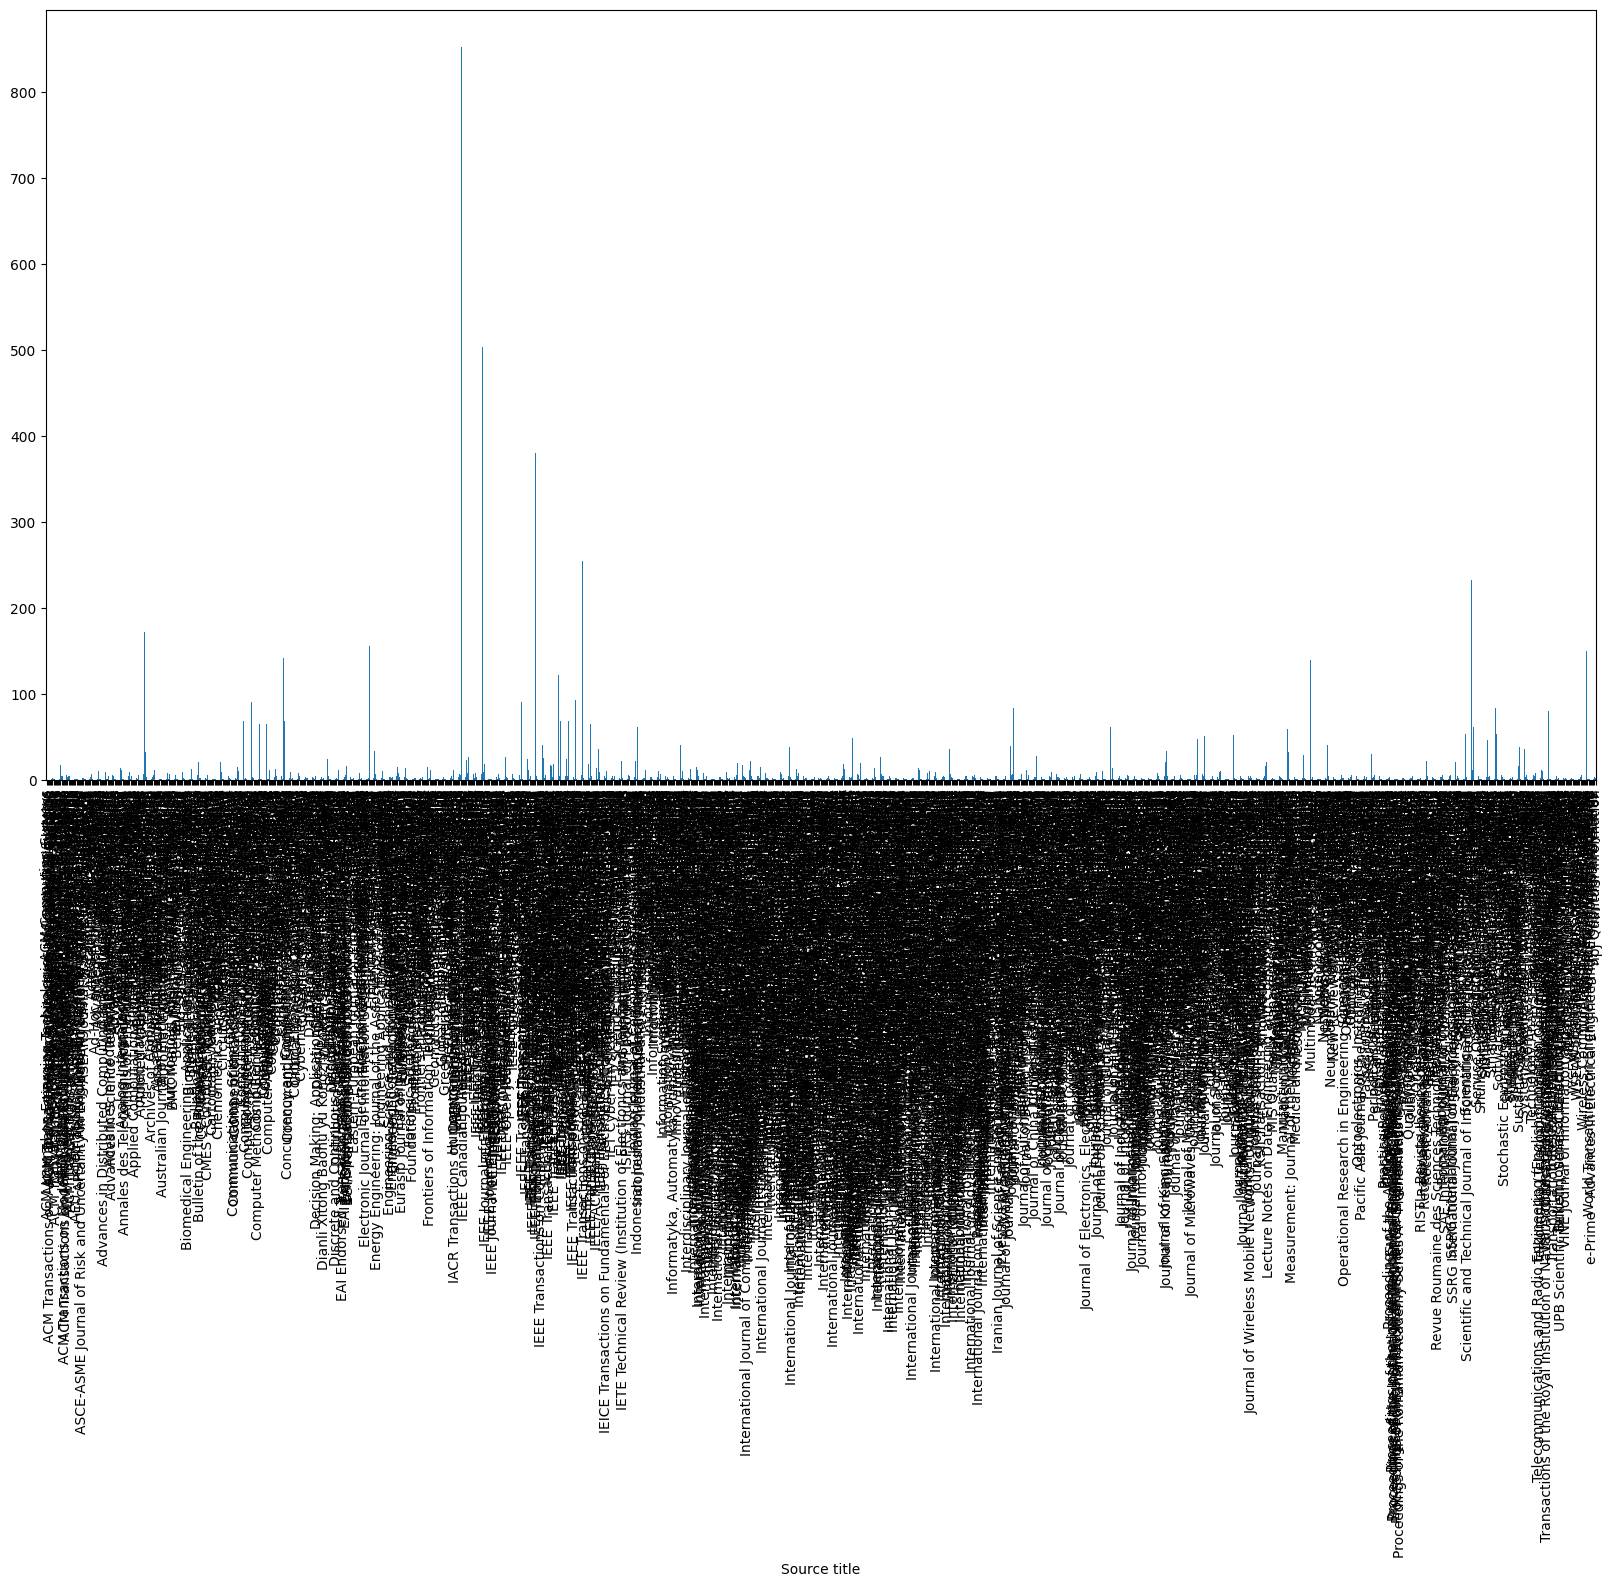

In [6]:
grouped = df.groupby('Source title')['Title'].count()
plt.figure(figsize=(20, 10))
grouped.plot(kind='bar')
plt.show()

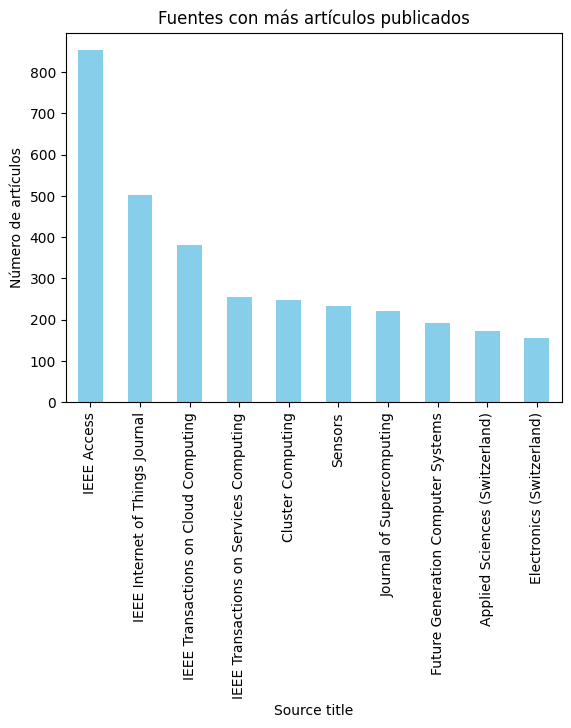

In [7]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(10)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

In [32]:
# Lista negra de palabras irrelevantes
blacklist = set(['based', 'using', 'system', 'edge', 'algorithm', 'scheme', 'resource','©','paper',' results', 'users', 'time','proposed', 'resources','information', 'systems'])

In [13]:
# Función para limpiar y preparar texto, excluyendo stopwords y palabras en la lista negra
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    new_var = ' '.join([word for word in text.split() if word not in stop_words and word not in blacklist])
    return new_var

# **Analizar Titulos**

In [15]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(13)

,Word,Frequency,Rank
0,cloud,5343,1.0
1,computing,3432,2.0
2,data,2573,3.0
3,secure,1025,4.0
4,learning,987,5.0
5,environment,980,6.0
6,scheduling,939,7.0
7,security,933,8.0
8,iot,912,9.0
9,model,814,10.0


from matplotlib import pyplot as plt
_df_0['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Rank'].plot(kind='hist', bins=20, title='Rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Frequency', y='Rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Rank']
  ys = series['Frequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Rank', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rank')
_ = plt.ylabel('Frequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Rank']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Rank'}, axis=1)
              .sort_values('Rank', ascending=True))
  xs = counted['Rank']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Rank', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rank')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Rank'].plot(kind='line', figsize=(8, 4), title='Rank')
plt.gca().spines[['top', 'right']].set_visible(False)

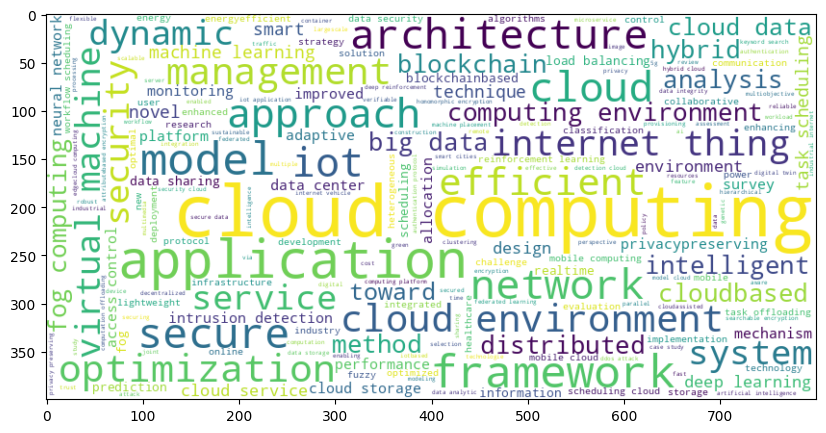

In [16]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

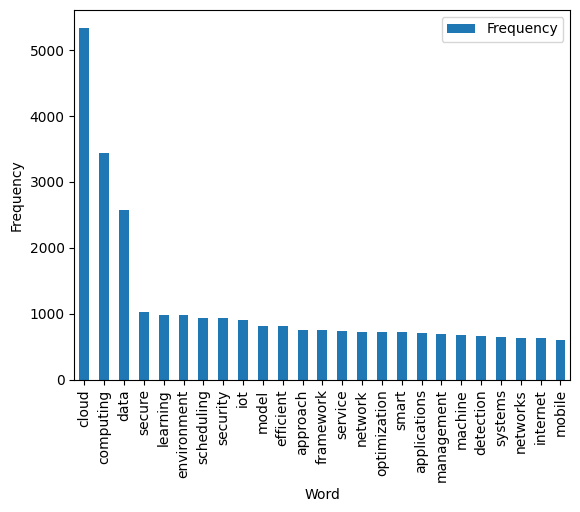

In [17]:
import matplotlib.pyplot as plt
word_df.sort_values(by='Frequency', ascending=False).head(25).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')

<ipython-input-18-5492a4065ecb>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama


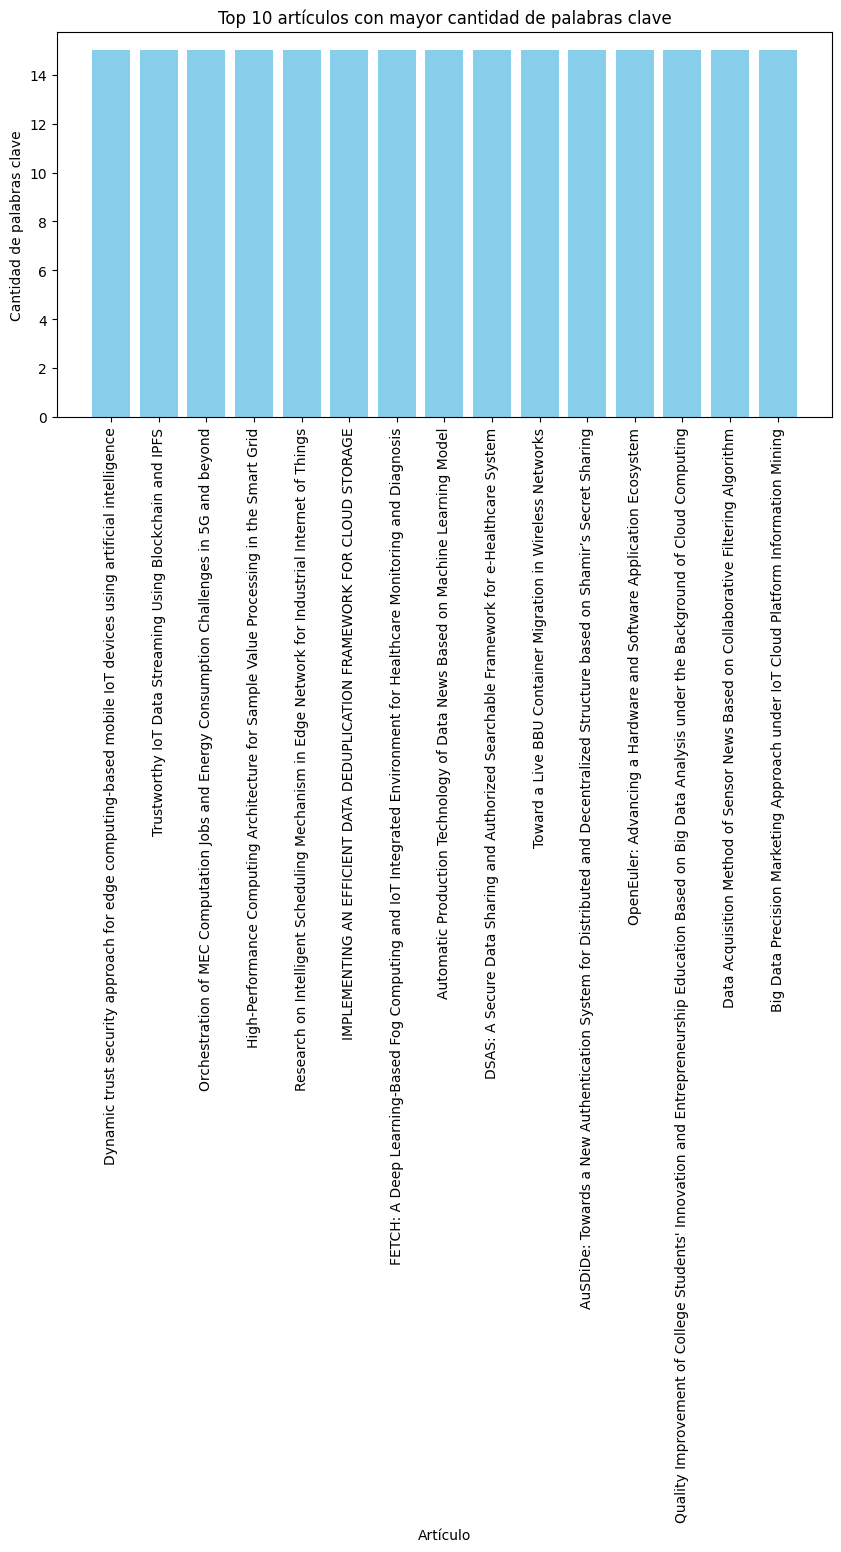

In [18]:
# Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 10)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 10 artículos con más palabras clave
plt.figure(figsize=(10, 5))
plt.bar(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave')
plt.title('Top 10 artículos con mayor cantidad de palabras clave')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

#**Analizar Abstract**


In [21]:
# Seleccionar los abstracts de los artículos con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(300)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")

Resumen 1:
The Industrial Internet of Things (IIoT) encompasses various applications such as smart cities, healthcare, and agriculture, which rely on a multitude of interconnected devices. Edge computing has emerged as a promising solution to address the challenges associated with data flow processing. Particularly, in scenarios like smart cities, where a massive number of IIoT devices are deployed, edge computing serves as the primary data processing layer.

Resumen 2:
© 2021 Huafeng Wang and Rong Huang. Informatization teaching has become an important method of physical education. Especially with the support of big data and cloud computing technology, physical education teaching pays more attention to the use of information technology to provide rich data information, focusing on the development of physical education under the rich virtual reality environment, targeted scene atmosphere layout, and abundant learning resources.

Resumen 3:
Despite the cloud’s enormous benefits like rea

In [22]:
# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")

Title: Dynamic trust security approach for edge computing-based mobile IoT devices using artificial intelligence
Summary: The Industrial Internet of Things (IIoT) encompasses various applications such as smart cities, healthcare, and agriculture, which rely on a multitude of interconnected devices. Edge computing has emerged as a promising solution to address the challenges associated with data flow processing.

Title: Application of Cloud Computing in the Optimization of College Calisthenics Teaching Mode
Summary: © 2021 Huafeng Wang and Rong Huang. Informatization teaching has become an important method of physical education.

Title: A robust and lightweight secure access scheme for cloud based E-healthcare services
Summary: Despite the cloud’s enormous benefits like real-time data access, patients’ EHR security and privacy are major concerns. © 2021, The Author(s), under exclusive licence to Springer Science+Business Media, LLC, part of Springer Nature.

Title: OPSA: an optimized pr

In [39]:
# Función para limpiar y preparar texto, excluyendo stopwords y palabras en la lista negra
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words and word not in blacklist])

In [40]:
# Aplicar la limpieza de texto a los abstracts
df['clean_abstract'] = df['Abstract'].apply(clean_text)

In [41]:
# Contar palabras en todos los abstracts
word_counts = Counter()
df['clean_abstract'].str.split().apply(word_counts.update)

0        None
1        None
2        None
3        None
4        None
         ... 
13310    None
13311    None
13312    None
13313    None
13314    None
Name: clean_abstract, Length: 13315, dtype: object

In [42]:
# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

In [43]:
# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

In [44]:
# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

In [48]:
# Mostrar el DataFrame de palabras ordenadas por rango
print(word_df.head(10))

           Word  Frequency  Rank
0         cloud      34396   1.0
1          data      31619   2.0
2     computing      21008   3.0
3      security      12210   4.0
4         model       9110   5.0
5       network       8848   6.0
6  applications       8715   7.0
7       service       8471   8.0
8   performance       7704   9.0
9       results       7322  10.0


In [30]:
# Concatenar todos los abstracts limpios en un solo texto
text = ' '.join(df['clean_abstract'])

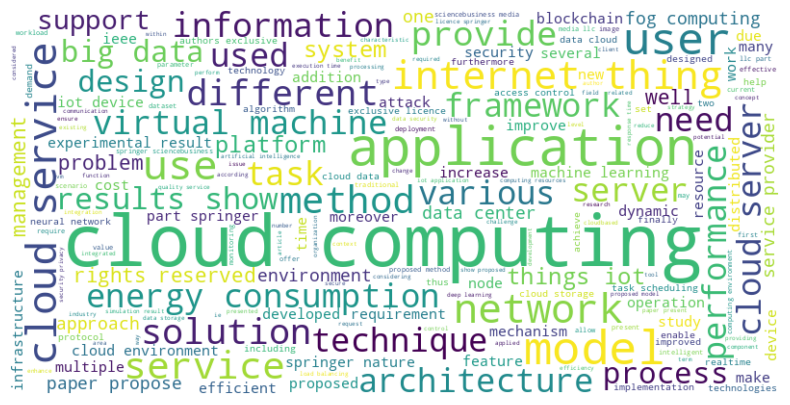

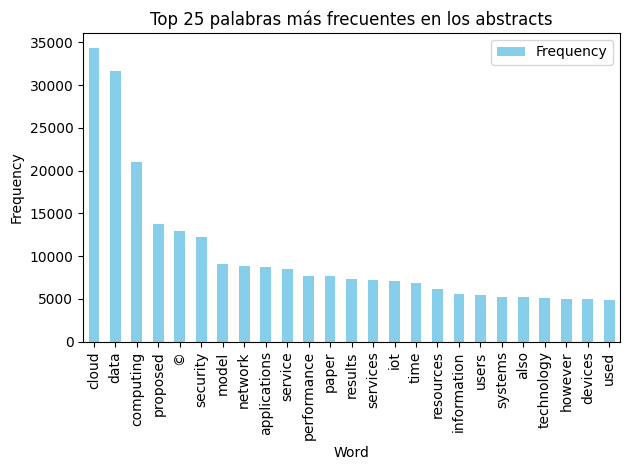

In [31]:
# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Graficar las palabras más frecuentes
word_df.sort_values(by='Frequency', ascending=False).head(25).plot(x='Word', y='Frequency', kind='bar', color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 25 palabras más frecuentes en los abstracts')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [49]:
# Aplicar la limpieza de texto a los títulos y abstracts
df['clean_title'] = df['Title'].apply(clean_text)
df['clean_abstract'] = df['Abstract'].apply(clean_text)

#**Analisis Palabras Clave**

In [50]:
# Determinar un número de palabras clave a considerar (e.g., top 10)
num_keywords = 15

# Función para contar cuántas palabras clave contiene cada texto
def count_keywords(text):
    words = clean_text(text).split()
    return sum(word in words for word in keywords)

# Contar la aparición de palabras clave en cada título y abstract
df['keyword_count_title'] = df['Title'].apply(count_keywords)
df['keyword_count_abstract'] = df['Abstract'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted_title = df.sort_values(by='keyword_count_title', ascending=False)
df_sorted_abstract = df.sort_values(by='keyword_count_abstract', ascending=False)

<ipython-input-51-16e5a45df025>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama


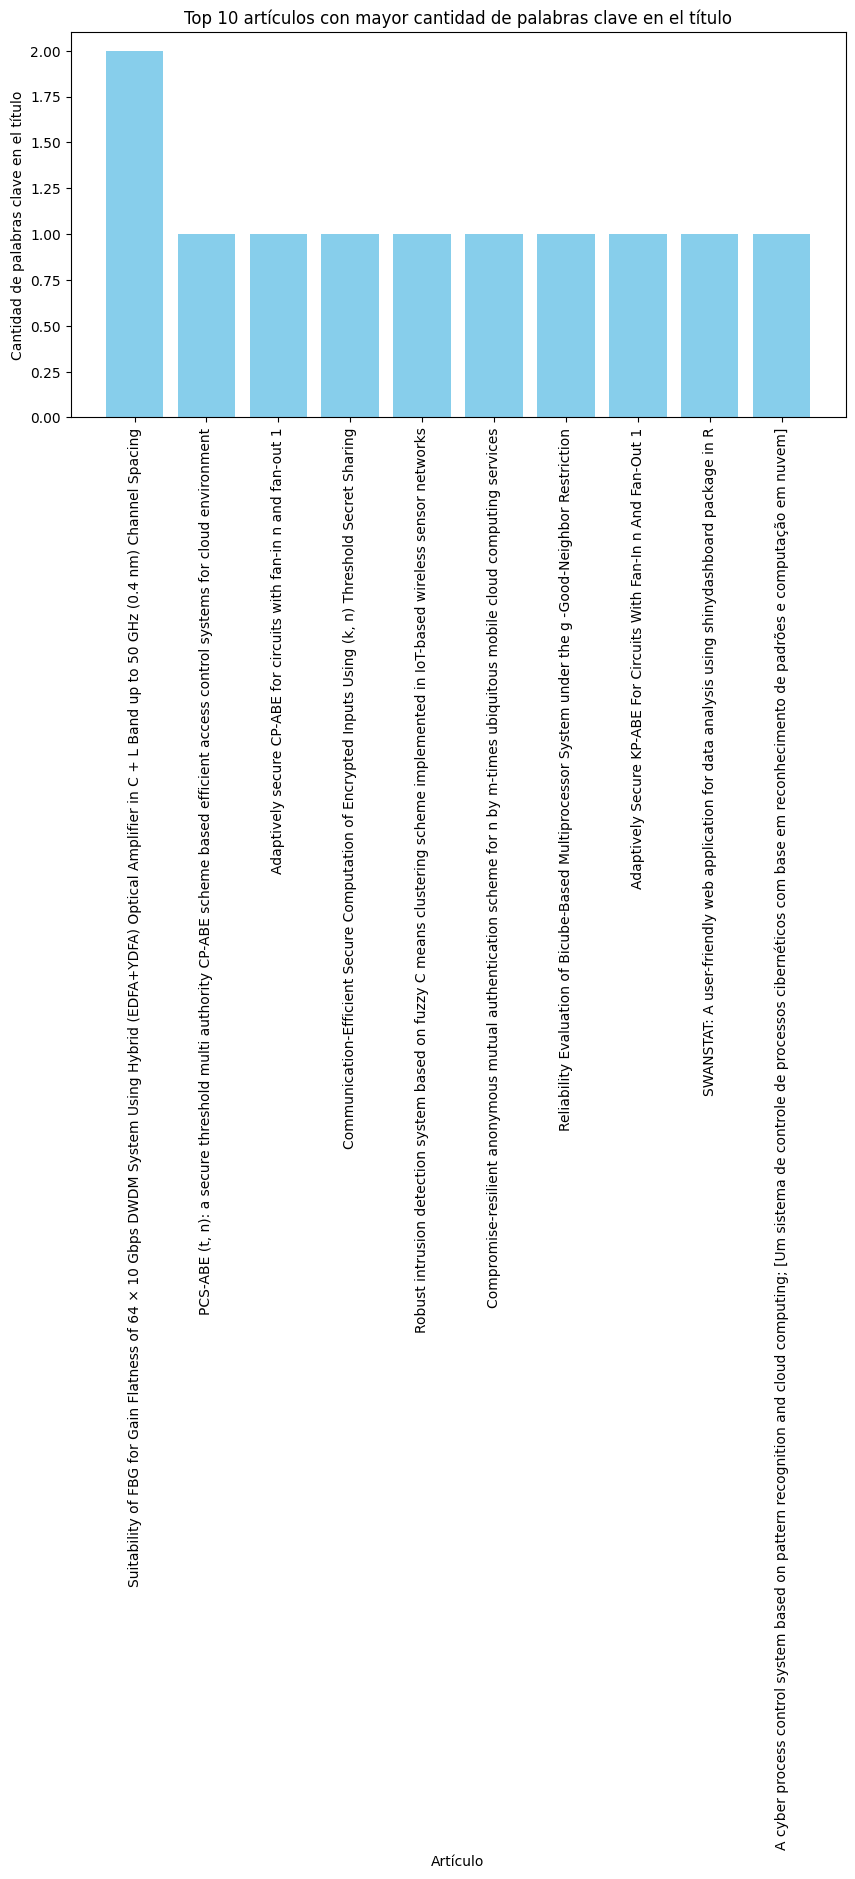

<ipython-input-51-16e5a45df025>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama


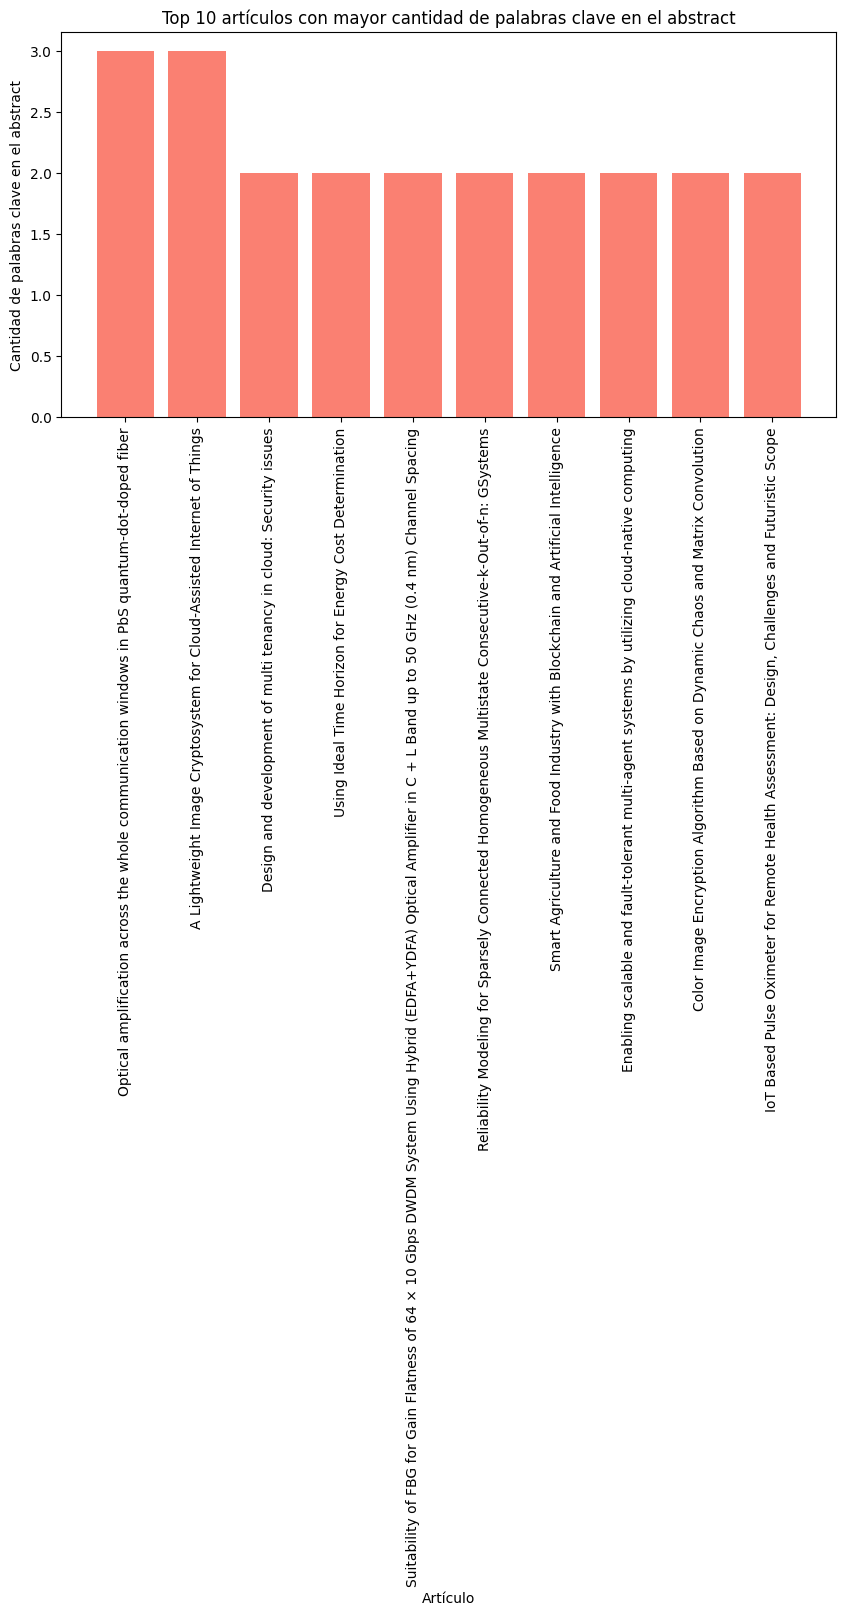

In [51]:
# Graficar los top 10 artículos con más palabras clave en los títulos
plt.figure(figsize=(10, 5))
plt.bar(df_sorted_title['Title'].head(10), df_sorted_title['keyword_count_title'].head(10), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave en el título')
plt.title('Top 10 artículos con mayor cantidad de palabras clave en el título')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

# Graficar los top 10 artículos con más palabras clave en los abstracts
plt.figure(figsize=(10, 5))
plt.bar(df_sorted_abstract['Title'].head(10), df_sorted_abstract['keyword_count_abstract'].head(10), color='salmon')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave en el abstract')
plt.title('Top 10 artículos con mayor cantidad de palabras clave en el abstract')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [52]:
# Contar el número de artículos por fuente
source_counts = df['Source title'].value_counts()

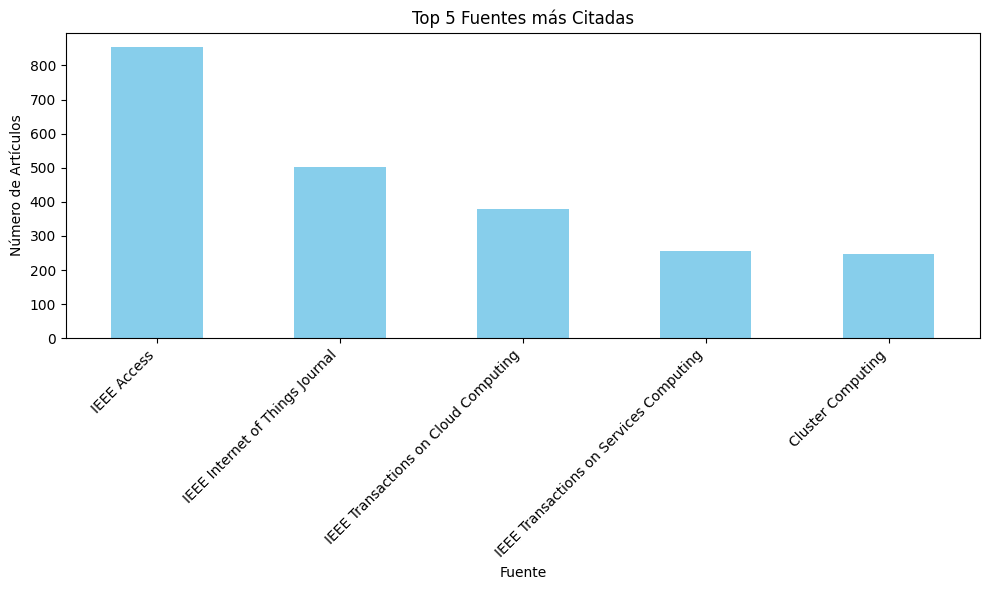

In [55]:
# Seleccionar las 10 fuentes más citadas
top_sources = source_counts.head(5)

# Graficar las fuentes más citadas
plt.figure(figsize=(10, 6))
top_sources.plot(kind='bar', color='skyblue')
plt.title('Top 5 Fuentes más Citadas')
plt.xlabel('Fuente')
plt.ylabel('Número de Artículos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#**Analisis Autores**


In [56]:
# Procesar la columna de autores para separar los nombres
authors = df['Authors'].str.split(';').explode()

# Contar la frecuencia de cada autor
author_counts = authors.value_counts()

In [58]:
# Seleccionar los 10 autores más nombrados
top_authors = author_counts.head(10)

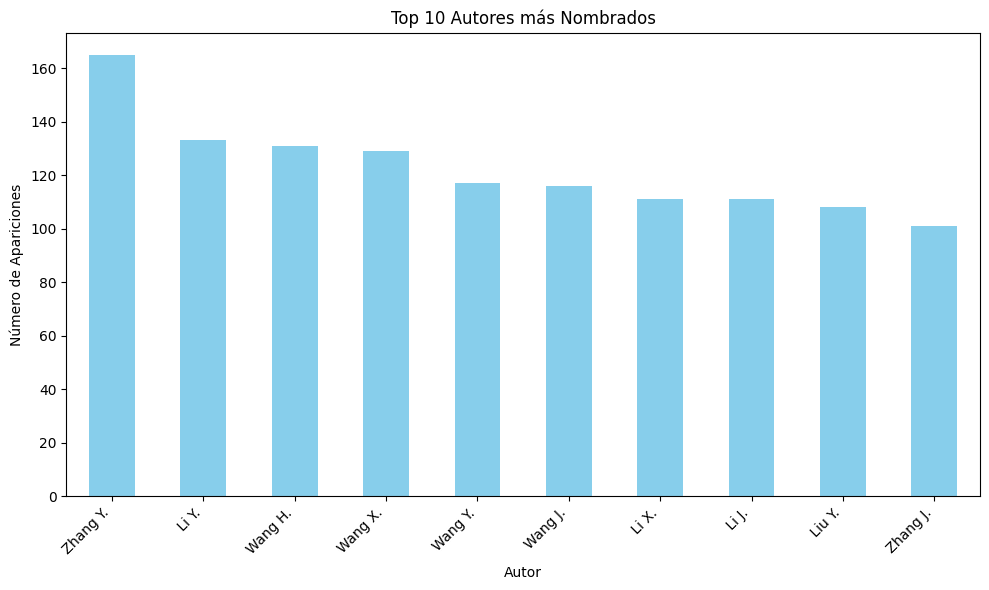

In [59]:
# Graficar los autores más nombrados
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Autores más Nombrados')
plt.xlabel('Autor')
plt.ylabel('Número de Apariciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

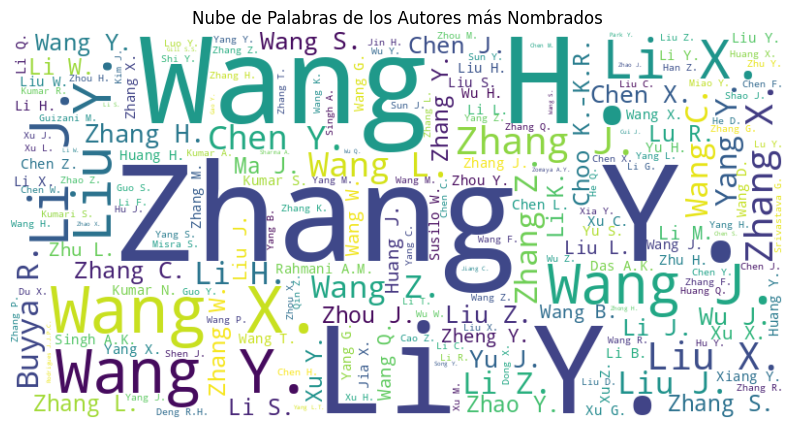

In [60]:
# Generar la nube de palabras de los autores
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(author_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Autores más Nombrados')
plt.show()


#**Hallazgos**

In [61]:
# Procesar títulos
stop_words = set(stopwords.words('english'))
df['clean_title'] = df['Title'].apply(clean_text)
word_counts_title = Counter()
df['clean_title'].str.split().apply(word_counts_title.update)

# Procesar autores
authors = df['Authors'].str.split(';').explode()
author_counts = authors.value_counts()

# Procesar abstracts
df['clean_abstract'] = df['Abstract'].apply(clean_text)
word_counts_abstract = Counter()
df['clean_abstract'].str.split().apply(word_counts_abstract.update)

# Procesar palabras clave
keywords = ['your', 'keywords', 'here']
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in keywords))

# Procesar fuentes
source_counts = df['Source title'].value_counts()

In [63]:
# Generar hallazgos en texto
findings_text = f"""
Hallazgos del Análisis:

Análisis de Títulos:
- Tendencias comunes y palabras más frecuentes en los títulos: {word_counts_title.most_common(10)}
- Nube de palabras de los títulos:

Análisis de Autores:
- Autores más mencionados: {author_counts.head(10)}

Análisis de Abstracts:
- Palabras clave más frecuentes en los abstracts: {word_counts_abstract.most_common(10)}
- Nube de palabras de los abstracts:

Análisis de Palabras Clave:
- Número de artículos con las palabras clave especificadas: {df['keyword_count'].sum()}
- Distribución de palabras clave en los títulos: {df['keyword_count'].describe()}

Análisis de Fuentes:
- Fuentes más citadas: {source_counts.head(10)}
"""

print(findings_text)


Hallazgos del Análisis:

Análisis de Títulos:
- Tendencias comunes y palabras más frecuentes en los títulos: [('cloud', 5343), ('computing', 3432), ('data', 2573), ('secure', 1025), ('learning', 987), ('environment', 980), ('scheduling', 939), ('security', 933), ('iot', 912), ('model', 814)]
- Nube de palabras de los títulos:

Análisis de Autores:
- Autores más mencionados: Authors
 Zhang Y.    165
 Li Y.       133
 Wang H.     131
 Wang X.     129
 Wang Y.     117
 Wang J.     116
 Li X.       111
 Li J.       111
 Liu Y.      108
 Zhang J.    101
Name: count, dtype: int64

Análisis de Abstracts:
- Palabras clave más frecuentes en los abstracts: [('cloud', 34396), ('data', 31619), ('computing', 21008), ('security', 12210), ('model', 9110), ('network', 8848), ('applications', 8715), ('service', 8471), ('performance', 7704), ('results', 7322)]
- Nube de palabras de los abstracts:

Análisis de Palabras Clave:
- Número de artículos con las palabras clave especificadas: 35
- Distribución 